<a href="https://colab.research.google.com/github/cristianosps/Introducao_Ciencia_de_Dados/blob/master/Interpretacao_Estatistica_NBA_1996_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

#**CESAR School/ CIn-UFPE - Especialização em Análise e Engenharia de Dados**

##**Projeto de Avaliação para Disciplina "Introdução à Análise de Dados"**

###**Professor: Luciano Barbosa**
###**Monitor: Johny Moreira**


###**Aluno:** Cristiano Siqueirra P. de Santana
###**Turma:** 2019.2 **| Matrícula:** 3415

---





##**1. Apresentação**

Neste projeto iremos realizar a leitura de uma determinada base de dados e faremos a interpretação das informações através das técnicas de extração e visualização de dados apresentadas durante a disciplina de "Introdução à Análise de Dados".

.

Nesta base de dados estão contidas informações relecionadas a estatística e aproveitamento de cada jogador da NBA, para cada temporada que disputou entre os anos de 1996 e 2018. 

Por este conjunto de dados podemos obter de cada jogador que passou pela NBA, entre os anos de 1996 e 2018, informações pessoais (Idade, País de origem, Faculdade...), porte físico (Altura, Peso...), Times/ Franquias que defendeu enquanto esteve na NBA e seu aproveitamento para cada temporada que disputou da liga.

.

**ATENÇÃO:** Na descrição da base de dados em sua origem, conforme fonte abaixo, diz que as informações são referentes as temporadas entre os anos de 1996 e 2016, porém ao começar a explorar algumas informações categorizadas ("draft_year", "sesion") foi verificado que a base foi atualizada e agora contempla dados de cada jogador até a temporada 2017-2018 da NBA.

.

(**Fonte:** https://www.kaggle.com/justinas/nba-players-data#all_seasons.csv)


---

.

##**2. Pré-processamento da Base de Dados a ser estudada neste projeto**

In [543]:
# Imports das bibliotecas necessárias para desenvolvimento do Projeto
import numpy as np      # Biblioteca de funções Numpy
import pandas as pd     # Biblioteca de funções Pamdas

# Bibliotecas para auxiliar na visualização dos dados
import seaborn as sns   
import matplotlib.pyplot as plt

import math

# Conexão com repositório da base de dados no projeto
dataset=pd.read_csv("https://raw.githubusercontent.com/cristianosps/Introducao_Ciencia_de_Dados/master/all_seasons1.csv")

# Apresentação dos dados "brutos" do repositório
dataset.head()


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
1,1,Darrell Armstrong,ORL,29.0,185.42,81.646560,Fayetteville State,USA,Undrafted,Undrafted,Undrafted,67,6.1,1.1,2.6,0.3,0.039,0.050,0.222,0.525,0.308,1996-97
2,2,Darrick Martin,LAC,26.0,180.34,77.110640,UCLA,USA,Undrafted,Undrafted,Undrafted,82,10.9,1.4,4.1,-4.5,0.016,0.060,0.232,0.539,0.292,1996-97
3,3,Darrin Hancock,ATL,25.0,200.66,92.986360,Kansas,USA,1994,2,38,24,1.8,0.8,0.5,-2.6,0.030,0.118,0.159,0.510,0.136,1996-97
4,4,Darvin Ham,IND,23.0,200.66,99.790240,Texas Tech,USA,Undrafted,Undrafted,Undrafted,36,2.3,1.6,0.4,-2.0,0.109,0.097,0.140,0.536,0.072,1996-97


In [544]:
# Apresentação das informações iniciais da base de dados

#  - Total de Entradas (10101)
#    . Índices inicial e final das entradas (0 - 10100)
#  - Toral de Colunas (22)
#  - Lista de Coulnas (Descrição na apresentação da base de dados)
#    . Nome da Coluna
#    . Valore nulo (S/N)
#    . Tipo de Dado

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10101 entries, 0 to 10100
Data columns (total 22 columns):
id                   10101 non-null int64
player_name          10101 non-null object
team_abbreviation    10101 non-null object
age                  10101 non-null float64
player_height        10101 non-null float64
player_weight        10101 non-null float64
college              10101 non-null object
country              10101 non-null object
draft_year           10101 non-null object
draft_round          10101 non-null object
draft_number         10101 non-null object
gp                   10101 non-null int64
pts                  10101 non-null float64
reb                  10101 non-null float64
ast                  10101 non-null float64
net_rating           10101 non-null float64
oreb_pct             10101 non-null float64
dreb_pct             10101 non-null float64
usg_pct              10101 non-null float64
ts_pct               10101 non-null float64
ast_pct              1

In [545]:
# Apresentação dos tipos de dados iniciais para cada coluna da base de dados

dataset.dtypes

id                     int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [0]:
# Criação categorias de dados para base com o objetivo auxiliar no entendimento e extração das informações existentes
# Colunas categorizadas: team_abbreviation | college | country | draft_year | season

dataset['team_abbreviation'] = dataset['team_abbreviation'].astype('category')
dataset['college'] = dataset['college'].astype('category')
dataset['country'] = dataset['country'].astype('category')
dataset['draft_year'] = dataset['draft_year'].astype('category')
dataset['season'] = dataset['season'].astype('category')

In [547]:
# Apresentação das categorias de dados criadas para base a ser estudada
# Colunas categorizadas: team_abbreviation | college | country | draft_year | season

dataset.dtypes

id                      int64
player_name            object
team_abbreviation    category
age                   float64
player_height         float64
player_weight         float64
college              category
country              category
draft_year           category
draft_round            object
draft_number           object
gp                      int64
pts                   float64
reb                   float64
ast                   float64
net_rating            float64
oreb_pct              float64
dreb_pct              float64
usg_pct               float64
ts_pct                float64
ast_pct               float64
season               category
dtype: object

In [548]:
# Apresetação do valores contidos na categoria "team_abbreviation"

dataset['team_abbreviation'].cat.categories

Index(['ATL', 'BKN', 'BOS', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN', 'DET',
       'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN',
       'NOH', 'NOK', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC',
       'SAS', 'SEA', 'TOR', 'UTA', 'VAN', 'WAS'],
      dtype='object')

In [549]:
# Apresetação do valores contidos na categoria "college"

dataset['college'].cat.categories

Index(['Alabama', 'Alabama A&M', 'Alabama-Birmingham', 'Alabama-Huntsville',
       'Albany State (GA)', 'American', 'American International', 'Arizona',
       'Arizona State', 'Arkansas',
       ...
       'William Paterson', 'Wingate', 'Wisconsin', 'Wisconsin-Green Bay',
       'Wisconsin-Stevens Point', 'Wright State', 'Wyoming', 'Xavier', 'Yale',
       'Yonsei (KOR)'],
      dtype='object', length=298)

In [550]:
# Apresetação do valores contidos na categoria "country"

dataset['country'].cat.categories

Index(['Argentina', 'Australia', 'Austria', 'Bahamas', 'Belize', 'Bosnia',
       'Bosnia & Herzegovina', 'Bosnia and Herzegovina', 'Brazil',
       'Cabo Verde', 'Cameroon', 'Canada', 'China', 'Congo', 'Croatia',
       'Czech Republic', 'Democratic Republic of the Congo',
       'Dominican Republic', 'Egypt', 'England', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Great Britain', 'Greece', 'Haiti',
       'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Latvia', 'Lithuania',
       'Macedonia', 'Mali', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nigeria', 'Panama', 'Poland', 'Puerto Rico', 'Russia',
       'Scotland', 'Senegal', 'Serbia', 'Serbia and Montenegro', 'Slovenia',
       'South Korea', 'South Sudan', 'Spain', 'St. Vincent & Grenadines',
       'Sudan (UK)', 'Sweden', 'Switzerland', 'Tanzania', 'Tunisia', 'Turkey',
       'U.S. Virgin Islands', 'US Virgin Islands', 'USA', 'USSR', 'Ukraine',
       'United Kingdom', 'Uruguay', 'Vene

In [551]:
# Apresetação do valores contidos na categoria "draft_year"

dataset['draft_year'].cat.categories

Index(['1963', '1976', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', 'Undrafted'],
      dtype='object')

In [552]:
# Apresetação do valores contidos na categoria "season"

dataset['season'].cat.categories

Index(['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02',
       '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18'],
      dtype='object')

In [553]:
# Apresetação dos dados do repositório após categorização da Base de Dados
# Colunas categorizadas: team_abbreviation | college | country | draft_year | season

dataset.head()

,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
1,1,Darrell Armstrong,ORL,29.0,185.42,81.646560,Fayetteville State,USA,Undrafted,Undrafted,Undrafted,67,6.1,1.1,2.6,0.3,0.039,0.050,0.222,0.525,0.308,1996-97
2,2,Darrick Martin,LAC,26.0,180.34,77.110640,UCLA,USA,Undrafted,Undrafted,Undrafted,82,10.9,1.4,4.1,-4.5,0.016,0.060,0.232,0.539,0.292,1996-97
3,3,Darrin Hancock,ATL,25.0,200.66,92.986360,Kansas,USA,1994,2,38,24,1.8,0.8,0.5,-2.6,0.030,0.118,0.159,0.510,0.136,1996-97
4,4,Darvin Ham,IND,23.0,200.66,99.790240,Texas Tech,USA,Undrafted,Undrafted,Undrafted,36,2.3,1.6,0.4,-2.0,0.109,0.097,0.140,0.536,0.072,1996-97


In [554]:
# Verificação do tamanho da base de dados a ser estudada [Número de entradas, Número de colunas/ Variáveis]

dataset.shape

(10101, 22)

In [555]:
# Verificação de valores nulos dentre as colunas da base de dados
# Base de dados bem concistente e com suas informações preenchidas para o período, sem a necessidade de remoção de colunas

print(dataset.isnull().sum())

id                   0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64


In [556]:
# Caso houvesse linhas(s) a ser(em) removida(s) o comando abaixo seria responsável por realizar o ajuste da base de dados

dataset1 = dataset.dropna(thresh=0.75*len(dataset), axis=1)
dataset1.head()

,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
1,1,Darrell Armstrong,ORL,29.0,185.42,81.646560,Fayetteville State,USA,Undrafted,Undrafted,Undrafted,67,6.1,1.1,2.6,0.3,0.039,0.050,0.222,0.525,0.308,1996-97
2,2,Darrick Martin,LAC,26.0,180.34,77.110640,UCLA,USA,Undrafted,Undrafted,Undrafted,82,10.9,1.4,4.1,-4.5,0.016,0.060,0.232,0.539,0.292,1996-97
3,3,Darrin Hancock,ATL,25.0,200.66,92.986360,Kansas,USA,1994,2,38,24,1.8,0.8,0.5,-2.6,0.030,0.118,0.159,0.510,0.136,1996-97
4,4,Darvin Ham,IND,23.0,200.66,99.790240,Texas Tech,USA,Undrafted,Undrafted,Undrafted,36,2.3,1.6,0.4,-2.0,0.109,0.097,0.140,0.536,0.072,1996-97


In [557]:
# Verificação da quantidade de entradas da base de dados a ser estudada 
#<Não houve a exclusão de nenhuma linha do Dataset> 

len(dataset1)

10101

In [558]:
# Continuando os ajustes para Base de Dados a ser trabalhada no DataFrame.

# Foi verificada durante o desenvolvimento do projeto a necessidade da EXCLUSÃO da seguintes colunas:

#   . draft_year
#   . draft_round
#   . draft_number
#   . net_rating
#   . oreb_pct
#   . dreb_pct
#   . usg_pct
#   . ts_pct
#   . ast_pct

dataset1 = dataset1.drop(columns=['draft_year',	'draft_round',	'draft_number','net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct'], axis=1)
dataset1.head()


,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,gp,pts,reb,ast,season
0,0,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,52,2.8,1.7,0.3,1996-97
1,1,Darrell Armstrong,ORL,29.0,185.42,81.646560,Fayetteville State,USA,67,6.1,1.1,2.6,1996-97
2,2,Darrick Martin,LAC,26.0,180.34,77.110640,UCLA,USA,82,10.9,1.4,4.1,1996-97
3,3,Darrin Hancock,ATL,25.0,200.66,92.986360,Kansas,USA,24,1.8,0.8,0.5,1996-97
4,4,Darvin Ham,IND,23.0,200.66,99.790240,Texas Tech,USA,36,2.3,1.6,0.4,1996-97


In [561]:
# Definição do NOVO Dataset a ser utilizado para extração e análise das informações da Base de Dados após ajustes

dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10101 entries, 0 to 10100
Data columns (total 13 columns):
id                   10101 non-null int64
player_name          10101 non-null object
team_abbreviation    10101 non-null category
age                  10101 non-null float64
player_height        10101 non-null float64
player_weight        10101 non-null float64
college              10101 non-null category
country              10101 non-null category
gp                   10101 non-null int64
pts                  10101 non-null float64
reb                  10101 non-null float64
ast                  10101 non-null float64
season               10101 non-null category
dtypes: category(4), float64(6), int64(2), object(1)
memory usage: 856.2+ KB


In [562]:
# Informações gerais da distribuição do Dados. 
# A partir dos dados carregados através de DataFrame teremos o Número de entradas, Média, Desvio Padrão, Valores mínimo/ máximo e Quartis

dataset1.describe()

,id,age,player_height,player_weight,gp,pts,reb,ast
count,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000
mean,5050.000000,27.292644,200.926942,100.860155,52.820513,8.075507,3.555153,1.790080
std,2916.051869,4.345829,9.245615,12.718714,25.048016,5.891083,2.490504,1.789905
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000
25%,2525.000000,24.000000,195.580000,90.718400,33.000000,3.500000,1.800000,0.500000
50%,5050.000000,27.000000,203.200000,100.243832,59.000000,6.600000,3.000000,1.200000
75%,7575.000000,30.000000,208.280000,110.676448,75.000000,11.400000,4.700000,2.400000
max,10100.000000,44.000000,231.140000,163.293120,85.000000,35.400000,16.300000,11.700000


### **Normalização**

In [563]:
# NORMALIZAÇÃO: As colunas 'pts', 'reb', 'ast' serão normalizadas:

# Referência para utlização de recursos para Normalização e Discretização 
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# ['PST'] : Média de PONTOS por temporada de um jogador da NBA
dataset1['pts'].describe()

count    10101.000000
mean         8.075507
std          5.891083
min          0.000000
25%          3.500000
50%          6.600000
75%         11.400000
max         35.400000
Name: pts, dtype: float64

In [564]:
# [PTS - NORMALIZAÇÃO] : Resultado da NORMALIZAÇÃO da coluna 'pts'

scaler = MinMaxScaler()
dataset1['pts_normal'] = scaler.fit_transform(dataset1[['pts']])
dataset1['pts_normal'].describe()

count    10101.000000
mean         0.228122
std          0.166415
min          0.000000
25%          0.098870
50%          0.186441
75%          0.322034
max          1.000000
Name: pts_normal, dtype: float64

In [565]:
# [PST - DESVIO PADRÃO] : Resultado após aplicar o DESVIO PADRÃO para coluna 'pts'

scaler = StandardScaler()
dataset1['pts_normal'] = scaler.fit_transform(dataset1[['pts']])
dataset1['pts_normal'].describe()

count    1.010100e+04
mean     1.601201e-16
std      1.000050e+00
min     -1.370870e+00
25%     -7.767220e-01
50%     -2.504769e-01
75%      5.643541e-01
max      4.638509e+00
Name: pts_normal, dtype: float64

In [566]:


# ['REB'] : Média de REBOTES por temporada de um jogador da NBA
dataset1['reb'].describe()

count    10101.000000
mean         3.555153
std          2.490504
min          0.000000
25%          1.800000
50%          3.000000
75%          4.700000
max         16.300000
Name: reb, dtype: float64

In [567]:
# [REB - NORMALIZAÇÃO] : Resultado da NORMALIZAÇÃO da coluna 'reb'

scaler = MinMaxScaler()
dataset1['reb_normal'] = scaler.fit_transform(dataset1[['reb']])
dataset1['reb_normal'].describe()

count    10101.000000
mean         0.218108
std          0.152792
min          0.000000
25%          0.110429
50%          0.184049
75%          0.288344
max          1.000000
Name: reb_normal, dtype: float64

In [568]:
# [REB - DESVIO PADRÃO] : Resultado após aplicar o DESVIO PADRÃO para coluna 'reb'

scaler = StandardScaler()
dataset1['reb_normal'] = scaler.fit_transform(dataset1[['reb']])
dataset1['reb_normal'].describe()

count    1.010100e+04
mean     4.294269e-17
std      1.000050e+00
min     -1.427554e+00
25%     -7.047729e-01
50%     -2.229189e-01
75%      4.597076e-01
max      5.117630e+00
Name: reb_normal, dtype: float64

In [569]:


# [AST]: Média de ASSISTÊNCIAS por temporada de um jogador da NBA

dataset1['ast'].describe()

count    10101.000000
mean         1.790080
std          1.789905
min          0.000000
25%          0.500000
50%          1.200000
75%          2.400000
max         11.700000
Name: ast, dtype: float64

In [570]:
# [AST - NORMALIZAÇÃO] : Resultado da NORMALIZAÇÃO da coluna 'ast'

scaler = MinMaxScaler()
dataset1['ast_normal'] = scaler.fit_transform(dataset1[['ast']])
dataset1['ast_normal'].describe()

count    10101.000000
mean         0.152998
std          0.152983
min          0.000000
25%          0.042735
50%          0.102564
75%          0.205128
max          1.000000
Name: ast_normal, dtype: float64

In [571]:
# [AST - DESVIO PADRÃO] : Resultado após aplicar o DESVIO PADRÃO para coluna 'ast'

scaler = StandardScaler()
dataset1['ast_normal'] = scaler.fit_transform(dataset1[['ast']])
dataset1['ast_normal'].describe()

count    1.010100e+04
mean     8.442355e-17
std      1.000050e+00
min     -1.000148e+00
25%     -7.207892e-01
50%     -3.296876e-01
75%      3.407723e-01
max      5.536837e+00
Name: ast_normal, dtype: float64

### **Discretização**

In [572]:
# [DISCRETIZAÇÃO - PTS] -  Discretização da coluna 'pts' (Intervalo da Média de Pontos em uma Temporada x Quantidade de Jogadores da NBA)

dataset1['pts_disct'] = pd.cut(dataset1['pts'], 15)
dataset1['pts_disct'].value_counts()

(2.36, 4.72]       2155
(4.72, 7.08]       1713
(-0.0354, 2.36]    1477
(7.08, 9.44]       1369
(9.44, 11.8]        989
(11.8, 14.16]       818
(14.16, 16.52]      534
(16.52, 18.88]      402
(18.88, 21.24]      293
(21.24, 23.6]       171
(23.6, 25.96]        86
(25.96, 28.32]       62
(28.32, 30.68]       22
(30.68, 33.04]        9
(33.04, 35.4]         1
Name: pts_disct, dtype: int64

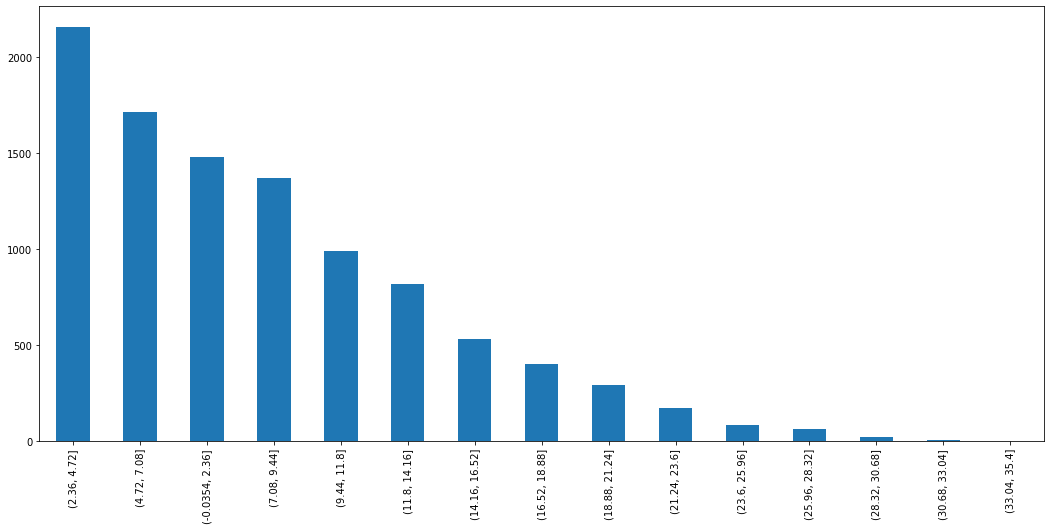

In [573]:
# [DISCRETIZAÇÃO - PTS - GRÁFICO] -  Visualização de Discretização da coluna 'pts' e seus intervalos 

# (Intervalo da Média de Pontos em uma Temporada x Quantidade de Jogadores da NBA)

counts = dataset1['pts_disct'].value_counts()
counts.plot.bar(figsize=(18,8))

In [574]:
# [DISCRETIZAÇÃO - REB] -  Discretização da coluna 'reb' # (Intervalo da Média de REBOTES em uma Temporada x Quantidade de Jogadores da NBA)

dataset1['reb_disct'] = pd.cut(dataset1['reb'], 10)
dataset1['reb_disct'].value_counts()

(1.63, 3.26]       3311
(-0.0163, 1.63]    2275
(3.26, 4.89]       2120
(4.89, 6.52]       1161
(6.52, 8.15]        597
(8.15, 9.78]        338
(9.78, 11.41]       196
(11.41, 13.04]       67
(13.04, 14.67]       27
(14.67, 16.3]         9
Name: reb_disct, dtype: int64

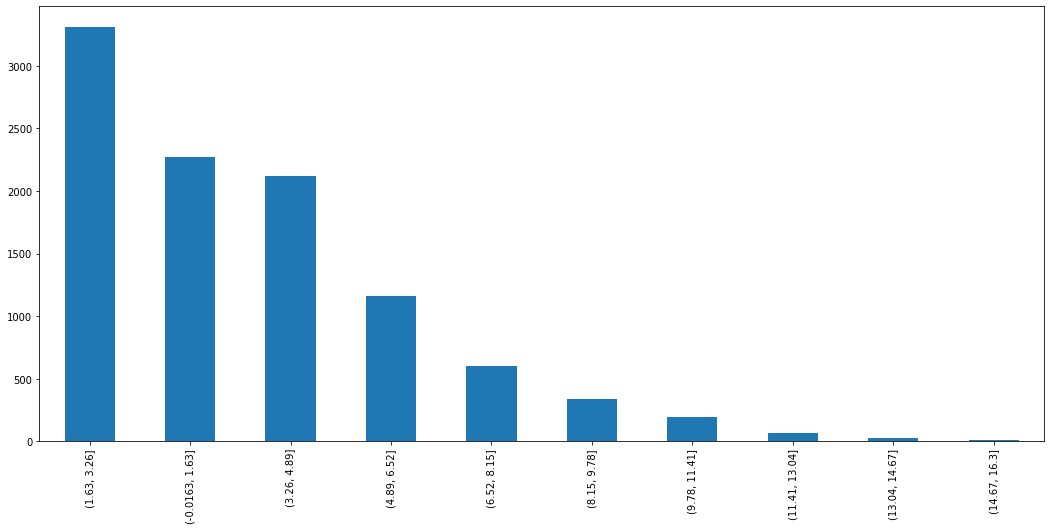

In [575]:
# [DISCRETIZAÇÃO - REB - GRÁFICO] -  Visualização de Discretização da coluna 'reb' e seus intervalos

# (Intervalo da Média de REBOTES em uma Temporada x Quantidade de Jogadores da NBA)

counts = dataset1['reb_disct'].value_counts()
counts.plot.bar(figsize=(18,8))

In [576]:
# [DISCRETIZAÇÃO - AST] -  Discretização da coluna 'ast' # (Intervalo da Média de ASSISTÊNCIAS em uma Temporada x Quantidade de Jogadores da NBA)

dataset1['ast_disct'] = pd.cut(dataset1['ast'],10)
dataset1['ast_disct'].value_counts()

(-0.0117, 1.17]    4914
(1.17, 2.34]       2578
(2.34, 3.51]       1240
(3.51, 4.68]        562
(4.68, 5.85]        374
(5.85, 7.02]        211
(7.02, 8.19]         97
(8.19, 9.36]         79
(9.36, 10.53]        26
(10.53, 11.7]        20
Name: ast_disct, dtype: int64

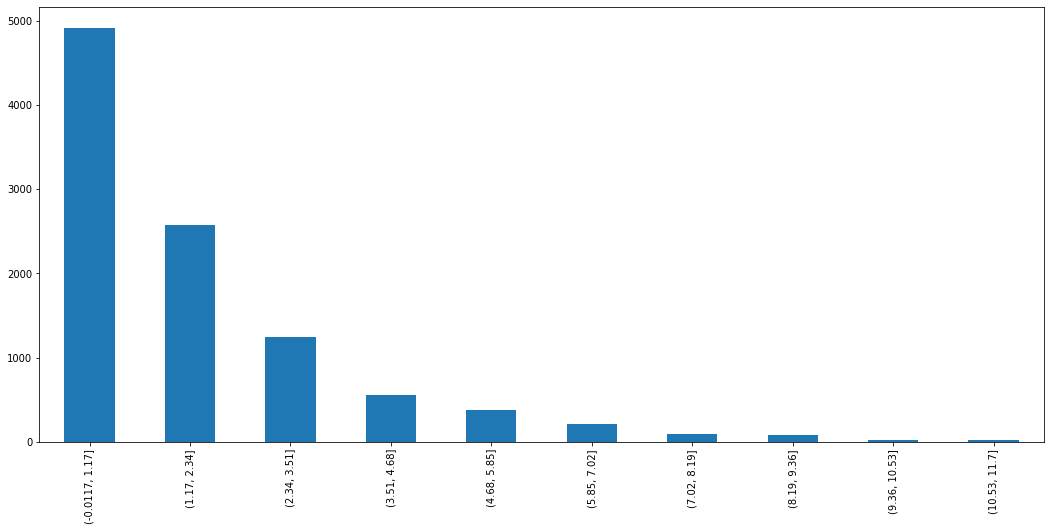

In [577]:
# [DISCRETIZAÇÃO - AST - GRÁFICO] -  Visualização de Discretização da coluna 'ast' e seus intervalos

# (Intervalo da Média de ASSISTÊNCIAS em uma Temporada x Quantidade de Jogadores da NBA)

counts = dataset1['ast_disct'].value_counts()
counts.plot.bar(figsize=(18,8))

##**3. Apresentação e Visualização de Estatística Descritiva dos Dados**

### **Limpeza de Dados**

Como verificado desde a preparação, não há valores duplicados ou outliers que possa prejudicar a análise, **a base de dados é concistente e com suas informações totalmente preenchidas para o período a ser estudado. Não haverá a necessidade de inserção/ inclusão de dados ausentes**.

In [597]:
# Visualizando de possíveis dados duplicados para Base de Dados
# A base de dados utilizada não precisará ser alterada/ manipulada por conter dados duplicados, preservando assim a quantidade de registros

dataset1[dataset1.duplicated(keep=False)]

,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,gp,pts,reb,ast,season,pts_normal,reb_normal,ast_normal,pts_disct,reb_disct,ast_disct


In [0]:
# Caso houvesse necessidade excluir dados duplicados poderíamos fazer a alteração/ manipulação para ajustar a Base de Dados

dataset1.drop_duplicates(inplace=True)

In [600]:
# Removendo outliers utilizando z-score robusto (univariado)

dataset1.describe()

,id,age,player_height,player_weight,gp,pts,reb,ast,pts_normal,reb_normal,ast_normal
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,5090.772295,27.041023,200.367039,100.610050,69.028537,18.503210,5.965933,3.808086,1.770170,0.968037,1.127493
std,2897.669199,3.815196,9.024408,12.730625,14.948864,3.779876,2.715630,2.150441,0.641658,1.090448,1.201487
min,5.000000,19.000000,165.100000,60.327736,1.000000,13.900000,0.000000,0.400000,0.988745,-1.427554,-0.776661
25%,2659.750000,24.000000,193.040000,90.718400,63.000000,15.500000,3.800000,2.200000,1.260356,0.098317,0.229029
50%,5161.500000,27.000000,200.660000,99.790240,74.000000,17.600000,5.300000,3.200000,1.616844,0.700635,0.787746
75%,7573.500000,29.000000,207.645000,109.202274,80.000000,20.600000,7.800000,5.000000,2.126114,1.704497,1.793435
max,10093.000000,40.000000,228.600000,154.221280,85.000000,35.400000,16.300000,11.600000,4.638509,5.117630,5.480965


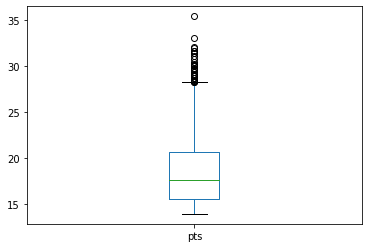

In [603]:
dataset1['pts'].plot.box()

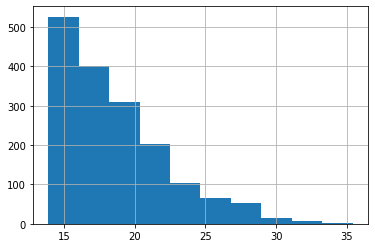

In [604]:
dataset1['pts'].hist()

### **Estatísticas Univariadas**

**Media**


In [578]:
# [MÉDIA DE PONTOS] : Média de pontos "GERAL" por jogador da NBA entre os anos de 1996 e 2018

dataset1['pts'].mean()

8.075507375507375

In [579]:
# [MÉDIA DE PONTOS] : Média de Pontos por Jogador da NBA em determinada Temporada, considerando que o atleta disputou pelo menos um jogo pela liga

# season: Temporada de referência
# gp : Média de partidas de um jogador na temporada 
# pts: Média de pontos de um jogador na temporada
# reb: Média de rebotes de um jogador na temporada
# ast: Média de assitências de um jogador na temporada  
# age: Média de idade de um jogador na temporada
# player_height: Média de altura de um jogador na temporada
# player_weight: Média de peso de um jogador na temporada

dataset1[(dataset1['gp']>0)].groupby('season')['season','gp','pts','reb','ast', 'age', 'player_height', 'player_weight'].mean()

,gp,pts,reb,ast,age,player_height,player_weight
season,,,,,,,
1996-97,53.870748,8.026077,3.546485,1.821088,27.963719,200.994830,100.526270
1997-98,54.671982,7.947608,3.516401,1.819818,28.084282,200.619499,100.265530
1998-99,33.974943,7.358542,3.421412,1.653759,28.002278,200.903007,100.639563
1999-00,55.458904,7.985845,3.652055,1.851370,28.107306,200.920959,100.735741
2000-01,54.356009,7.811338,3.619048,1.823583,28.097506,200.752154,100.842450
2001-02,54.334091,7.982727,3.633636,1.841136,27.672727,201.017909,101.288124
2002-03,55.932243,7.849299,3.593692,1.782944,27.530374,201.520514,102.032765
2003-04,54.056561,7.745475,3.583484,1.758597,27.457014,201.315113,101.635395
2004-05,53.778017,8.088147,3.577802,1.774138,27.297414,201.245733,101.697477


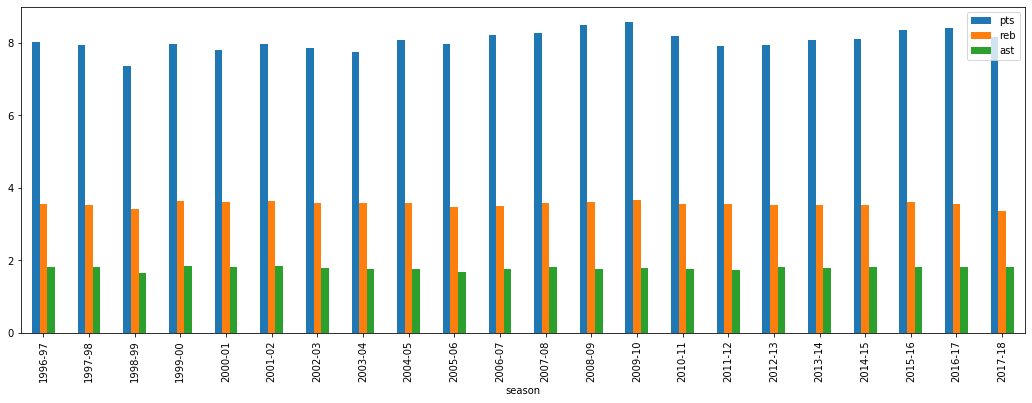

In [580]:
# [MÉDIA DE PONTOS - GRÁFICO] : Gráfico da média de Pontos, média de rebotes e média de assistências por Jogador da NBA em determinada Temporada, 
#                     considerando que o atleta disputou pelo menos um jogo pela liga

# season: Temporada de referência
# pts: Média de pontos de um jogador na temporada
# reb: Média de rebotes de um jogador na temporada
# ast: Média de assitências de um jogador na temporada  

dataset1[(dataset1['gp']>0)].groupby('season')['pts', 'reb', 'ast'].mean().plot.bar(figsize=(18, 6))

In [581]:
# [MÉDIA DE PONTOS - ESTRANGEIROS] : Média de Pontos de Jogador ESTRANGEIROS da NBA em determinada Temporada, considerando que o atleta disputou 
#                                    pelo menos um jogo pela liga

# season: Temporada de referência
# gp : Média de partidas de um jogador na temporada 
# pts: Média de pontos de um jogador na temporada
# reb: Média de rebotes de um jogador na temporada
# ast: Média de assitências de um jogador na temporada  
# age: Média de idade de um jogador na temporada
# player_height: Média de altura de um jogador na temporada
# player_weight: Média de peso de um jogador na temporada

dataset_e = dataset1
dataset_e[(dataset_e['gp']>0) & (dataset_e['country'] != 'USA')].groupby('season')['season','gp','pts','reb','ast', 'age', 
                                                                                   'player_height', 'player_weight'].mean()


,gp,pts,reb,ast,age,player_height,player_weight
season,,,,,,,
1996-97,73.777778,13.622222,6.877778,2.566667,28.888889,210.255556,113.549197
1997-98,65.357143,11.835714,6.507143,1.978571,27.214286,209.368571,113.009207
1998-99,36.272727,9.850000,5.554545,1.613636,26.090909,209.780909,110.758919
1999-00,61.666667,8.954167,5.062500,1.458333,26.958333,208.915000,111.640331
2000-01,52.050000,6.932500,4.055000,1.112500,26.100000,209.042000,111.164059
2001-02,56.627451,7.211765,4.035294,1.207843,25.803922,208.628627,110.925479
2002-03,51.887097,6.866129,3.658065,1.277419,26.016129,208.116129,110.303332
2003-04,58.639344,7.677049,3.998361,1.568852,25.688525,207.821967,108.542335
2004-05,52.743243,7.278378,3.654054,1.424324,25.567568,207.833784,109.162431


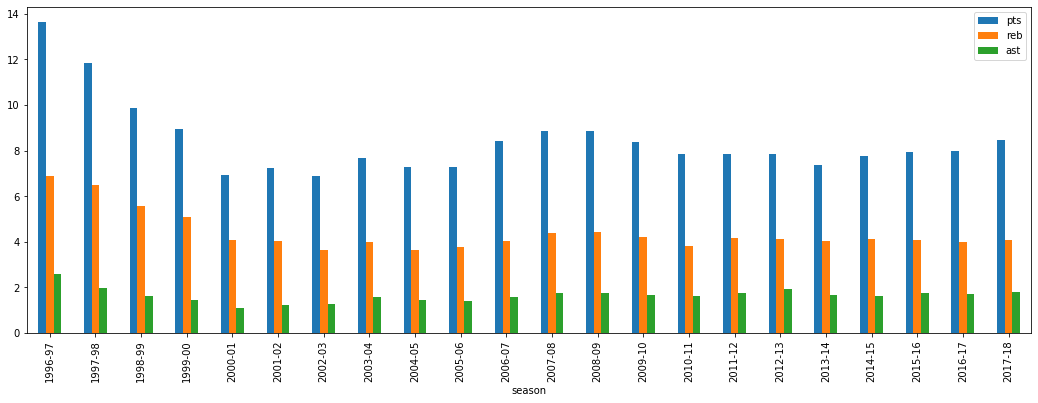

In [582]:
# [MÉDIA DE PONTOS - ESTRANGEIROS - GRÁFICO] : Gráfico da média de Pontos, média de rebotes e média de assistências para Jogadores ESTRANGEIROS da NBA 
#                                              em determinada Temporada, considerando que o atleta disputou pelo menos um jogo pela liga

# season: Temporada de referência
# pts: Média de pontos de um jogador na temporada
# reb: Média de rebotes de um jogador na temporada
# ast: Média de assitências de um jogador na temporada  

dataset_e[(dataset_e['gp']>0) & (dataset_e['country'] != 'USA')].groupby('season')['pts','reb','ast'].mean().plot.bar(figsize=(18, 6))

In [594]:
# [MÉDIA DE PONTOS] : Jogadores da NBA com a maior média de pontos na história da liga para uma temporada entre os anos de 1996 e 2018

# team_abbreviation : Time/ franquia que o jogador defendia na temporada 
# gp : Média de partidas de um jogador na temporada 
# pts: Média de pontos de um jogador na temporada
# reb: Média de rebotes de um jogador na temporada
# ast: Média de assitências de um jogador na temporada 
# season: Temporada de referência 

#dataset_s = dataset1[(dataset1['pts'] == dataset1['pts'].max())].groupby('player_name')
#dataset_s = dataset_s['player_name', 'team_abbreviation', 'age', 'country', 'gp', 'pts', 'reb', 'ast', 'season']
#dataset_s.head()

# [GERAL] : Maiores médias de pontos Entre todos os jogadores

dataset1 = dataset1[(dataset1['pts'] > dataset1['pts'].mean())].sort_values(by='pts', ascending=False)
dataset1.head()

,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,gp,pts,reb,ast,season,pts_normal,reb_normal,ast_normal,pts_disct,reb_disct,ast_disct
4343,4343,Kobe Bryant,LAL,27.0,198.12,99.79024,None,USA,80,35.4,5.3,4.5,2005-06,4.638509,0.700635,1.514077,"(33.04, 35.4]","(4.89, 6.52]","(3.51, 4.68]"
4127,4127,Allen Iverson,PHI,31.0,182.88,74.84268,Georgetown,USA,72,33.0,3.2,7.4,2005-06,4.231094,-0.142610,3.134355,"(30.68, 33.04]","(1.63, 3.26]","(7.02, 8.19]"
3030,3030,Tracy McGrady,ORL,24.0,203.20,95.25432,None,USA,75,32.1,6.5,5.5,2002-03,4.078313,1.182489,2.072794,"(30.68, 33.04]","(4.89, 6.52]","(4.68, 5.85]"
7789,7789,Kevin Durant,OKC,25.0,205.74,108.86208,Texas,USA,81,32.0,7.4,5.5,2013-14,4.061337,1.543879,2.072794,"(30.68, 33.04]","(6.52, 8.15]","(4.68, 5.85]"
9323,9323,Russell Westbrook,OKC,28.0,190.50,90.71840,UCLA,USA,81,31.6,10.7,10.4,2016-17,3.993435,2.868978,4.810505,"(30.68, 33.04]","(9.78, 11.41]","(9.36, 10.53]"


In [595]:
# [JOGADORES ESTRANGEIROS] : Maiores médias de pontos entre jogadores estrangeiros
 
dataset_e = dataset1[(dataset1['pts'] > dataset1['pts'].mean()) & (dataset1['country'] != 'USA')].sort_values(by='pts', ascending=False)
dataset_e.head()

,id,player_name,team_abbreviation,age,player_height,player_weight,college,country,gp,pts,reb,ast,season,pts_normal,reb_normal,ast_normal,pts_disct,reb_disct,ast_disct
10093,10093,Giannis Antetokounmpo,MIL,23.0,210.82,100.697424,None,Greece,75,26.9,10.0,4.8,2017-18,3.195579,2.587896,1.681692,"(25.96, 28.32]","(9.78, 11.41]","(4.68, 5.85]"
4017,4017,Dirk Nowitzki,DAL,28.0,213.36,111.130040,None,Germany,81,26.6,9.0,2.8,2005-06,3.144653,2.186351,0.564259,"(25.96, 28.32]","(8.15, 9.78]","(2.34, 3.51]"
3573,3573,Dirk Nowitzki,DAL,27.0,213.36,111.130040,None,Germany,78,26.1,9.7,3.1,2004-05,3.059774,2.467433,0.731874,"(25.96, 28.32]","(8.15, 9.78]","(2.34, 3.51]"
5665,5665,Dirk Nowitzki,DAL,31.0,213.36,111.130040,None,Germany,81,25.9,8.4,2.4,2008-09,3.025823,1.945424,0.340772,"(23.6, 25.96]","(8.15, 9.78]","(2.34, 3.51]"
2506,2506,Tim Duncan,SAS,26.0,213.36,117.933920,Wake Forest,US Virgin Islands,82,25.5,12.7,3.7,2001-02,2.957920,3.672068,1.067104,"(23.6, 25.96]","(11.41, 13.04]","(3.51, 4.68]"


**Mediana**

In [585]:
# [MEDIANA] : Registro do Dataset que representa a Mediana (linha central) para Base de Dados 

dataset1.median()

id               5266.000000
age                27.000000
player_height     200.660000
player_weight      99.790240
gp                 74.000000
pts                12.600000
reb                 4.500000
ast                 2.400000
pts_normal          0.768062
reb_normal          0.379399
ast_normal          0.340772
dtype: float64

**Moda**

In [586]:
# [MODA] : Média de pontos com mais ocorrência entre os jogadores de NBA que pontuaram entre os anos de 1996 e 2018, 
#          considerando que o atleta disputou pelo menos um jogo pela liga

dataset1[(dataset1['gp']>0)]['pts'].mode()

0    8.4
dtype: float64

**Variância**

In [587]:
# [VARIÂNCIA] : Variância entre a média de pontos entre os jogadores da NBA que têm a menor e maior média de pontos entre
#               as temporadas de 1996 e 2018, considerando que o atleta disputou pelo menos um jogo pela liga 

dataset1[(dataset1['gp']>0)]['pts'].var()

22.343847557529358

**Desvio Padrão**

In [588]:
# [DESVIO PADRÃO] : Desvio Padrão "geral" para média de pontos entre os jogadores da NBA entre os anos de 1996 e 2018

dataset1[(dataset1['gp']>0)]['pts'].std()

4.7269279196460525

In [589]:
# [DESVIO PADRÃO] : Desvio Padrão para média de pontos, média de rebotes e média de assintências entre os jogadores da NBA para determinada temporada

dataset1[(dataset1['gp']>0)].groupby('season')['season', 'pts','reb','ast'].std()

,pts,reb,ast
season,,,
1996-97,4.536393,2.693464,2.209072
1997-98,4.412825,2.654890,1.997969
1998-99,4.157414,2.601984,2.047200
1999-00,4.737316,2.539302,2.077898
2000-01,5.260384,2.655347,2.081882
2001-02,4.868275,2.494543,2.116876
2002-03,5.118563,2.384348,1.858723
2003-04,4.529758,2.545409,1.877039
2004-05,4.947766,2.539804,2.004605


In [0]:
# Caso houvesse necessidade excluir dados duplicados poderíamos fazer a alteração/ manipulação para ajustar a Base de Dados

dataset1.drop_duplicates(inplace=True)

### **Estatísticas Bivariadas**

In [617]:
dataset1.cov()

,id,age,player_height,player_weight,gp,pts,reb,ast,pts_normal,reb_normal,ast_normal
id,8.396487e+06,-614.427893,-1317.282644,-593.494176,-1865.019673,-299.555783,-533.463383,41.592443,-50.851533,-214.209568,23.238389
age,-6.144279e+02,14.555722,0.197879,2.735932,-4.093378,-0.622083,-0.343456,0.364510,-0.105603,-0.137913,0.203658
player_height,-1.317283e+03,0.197879,81.439933,95.921411,-1.862259,1.297535,17.597004,-12.232089,0.220265,7.065989,-6.834271
player_weight,-5.934942e+02,2.735932,95.921411,162.068814,-11.144103,3.519437,25.826671,-14.384177,0.597447,10.370571,-8.036678
gp,-1.865020e+03,-4.093378,-1.862259,-11.144103,223.468549,5.717041,1.623638,2.571810,0.970505,0.651964,1.436913
pts,-2.995558e+02,-0.622083,1.297535,3.519437,5.717041,14.287461,2.057064,1.851390,2.425389,0.826004,1.034402
reb,-5.334634e+02,-0.343456,17.597004,25.826671,1.623638,2.057064,7.374645,-1.955989,0.349200,2.961252,-1.092843
ast,4.159244e+01,0.364510,-12.232089,-14.384177,2.571810,1.851390,-1.955989,4.624396,0.314285,-0.785417,2.583727
pts_normal,-5.085153e+01,-0.105603,0.220265,0.597447,0.970505,2.425389,0.349200,0.314285,0.411725,0.140219,0.175596
reb_normal,-2.142096e+02,-0.137913,7.065989,10.370571,0.651964,0.826004,2.961252,-0.785417,0.140219,1.189076,-0.438826


In [591]:
dataset1.corr(method='spearman')

,id,age,player_height,player_weight,gp,pts,reb,ast,pts_normal,reb_normal,ast_normal
id,1.000000,-0.084063,-0.013841,-0.019418,-0.056786,-0.027995,-0.059183,-0.029571,-0.027995,-0.059183,-0.029571
age,-0.084063,1.000000,-0.034147,0.014674,-0.065848,-0.032059,-0.056075,0.096298,-0.032059,-0.056075,0.096298
player_height,-0.013841,-0.034147,1.000000,0.854972,0.003395,0.010545,0.749884,-0.579742,0.010545,0.749884,-0.579742
player_weight,-0.019418,0.014674,0.854972,1.000000,-0.020592,0.029501,0.737157,-0.530368,0.029501,0.737157,-0.530368
gp,-0.056786,-0.065848,0.003395,-0.020592,1.000000,0.090504,0.069982,0.062697,0.090504,0.069982,0.062697
pts,-0.027995,-0.032059,0.010545,0.029501,0.090504,1.000000,0.317979,0.453965,1.000000,0.317979,0.453965
reb,-0.059183,-0.056075,0.749884,0.737157,0.069982,0.317979,1.000000,-0.232815,0.317979,1.000000,-0.232815
ast,-0.029571,0.096298,-0.579742,-0.530368,0.062697,0.453965,-0.232815,1.000000,0.453965,-0.232815,1.000000
pts_normal,-0.027995,-0.032059,0.010545,0.029501,0.090504,1.000000,0.317979,0.453965,1.000000,0.317979,0.453965
reb_normal,-0.059183,-0.056075,0.749884,0.737157,0.069982,0.317979,1.000000,-0.232815,0.317979,1.000000,-0.232815


In [592]:
dataset1.corr(method='pearson')

,id,age,player_height,player_weight,gp,pts,reb,ast,pts_normal,reb_normal,ast_normal
id,1.000000,-0.088303,-0.018921,-0.018363,-0.012996,-0.025965,-0.050721,-0.024318,-0.025965,-0.050721,-0.024318
age,-0.088303,1.000000,-0.022808,0.021515,-0.051849,-0.049860,-0.037889,0.077663,-0.049860,-0.037889,0.077663
player_height,-0.018921,-0.022808,1.000000,0.840549,0.003294,0.020230,0.679324,-0.574280,0.020230,0.679324,-0.574280
player_weight,-0.018363,0.021515,0.840549,1.000000,-0.024341,0.047743,0.684327,-0.497334,0.047743,0.684327,-0.497334
gp,-0.012996,-0.051849,0.003294,-0.024341,1.000000,0.106552,0.069752,0.073849,0.106552,0.069752,0.073849
pts,-0.025965,-0.049860,0.020230,0.047743,0.106552,1.000000,0.309699,0.395777,1.000000,0.309699,0.395777
reb,-0.050721,-0.037889,0.679324,0.684327,0.069752,0.309699,1.000000,-0.199521,0.309699,1.000000,-0.199521
ast,-0.024318,0.077663,-0.574280,-0.497334,0.073849,0.395777,-0.199521,1.000000,0.395777,-0.199521,1.000000
pts_normal,-0.025965,-0.049860,0.020230,0.047743,0.106552,1.000000,0.309699,0.395777,1.000000,0.309699,0.395777
reb_normal,-0.050721,-0.037889,0.679324,0.684327,0.069752,0.309699,1.000000,-0.199521,0.309699,1.000000,-0.199521


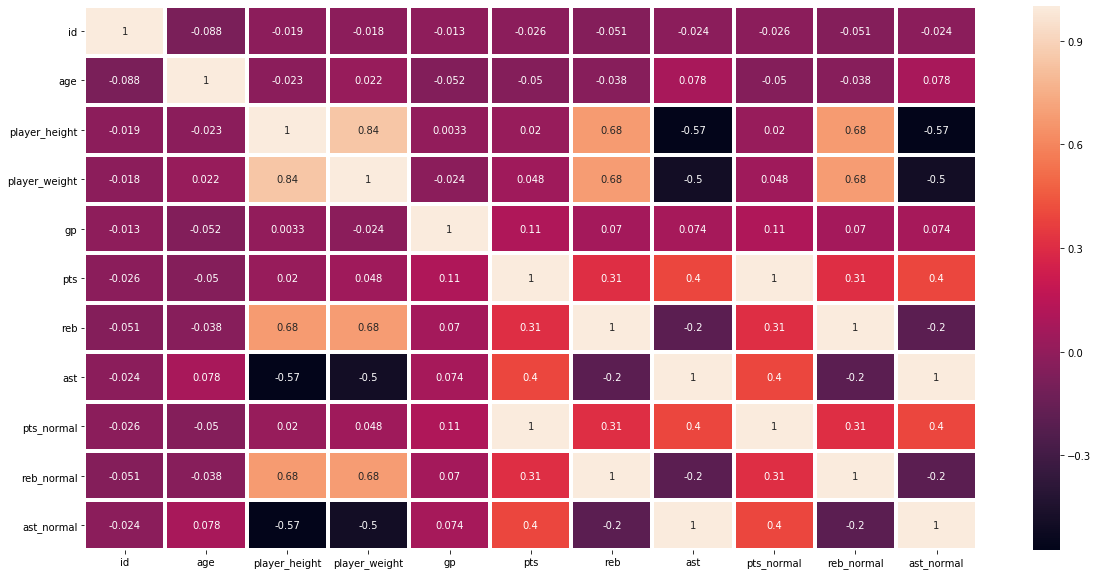

In [593]:
plt.figure(figsize = (20,10))
sns.heatmap(dataset1.corr(),annot = True,linewidths = 3.0);